<a href="https://colab.research.google.com/github/TusharGwal/Machine-Learning/blob/main/Natural_Language_Processing/natural_language_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

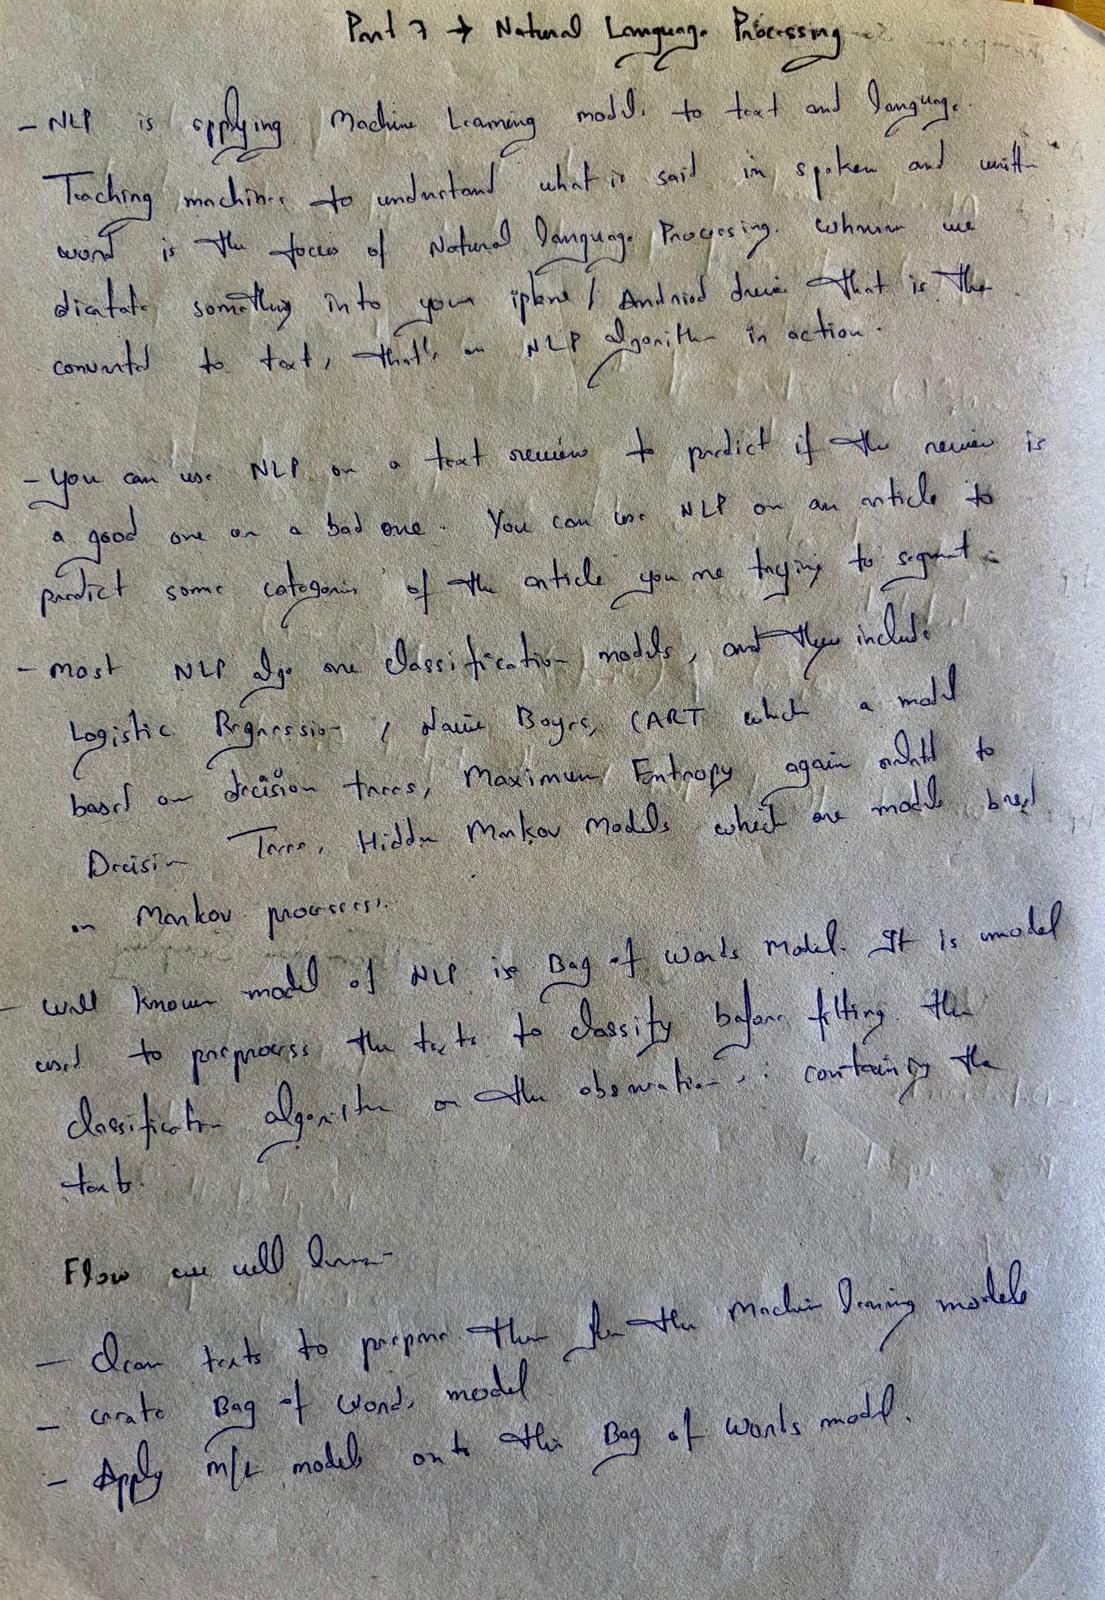

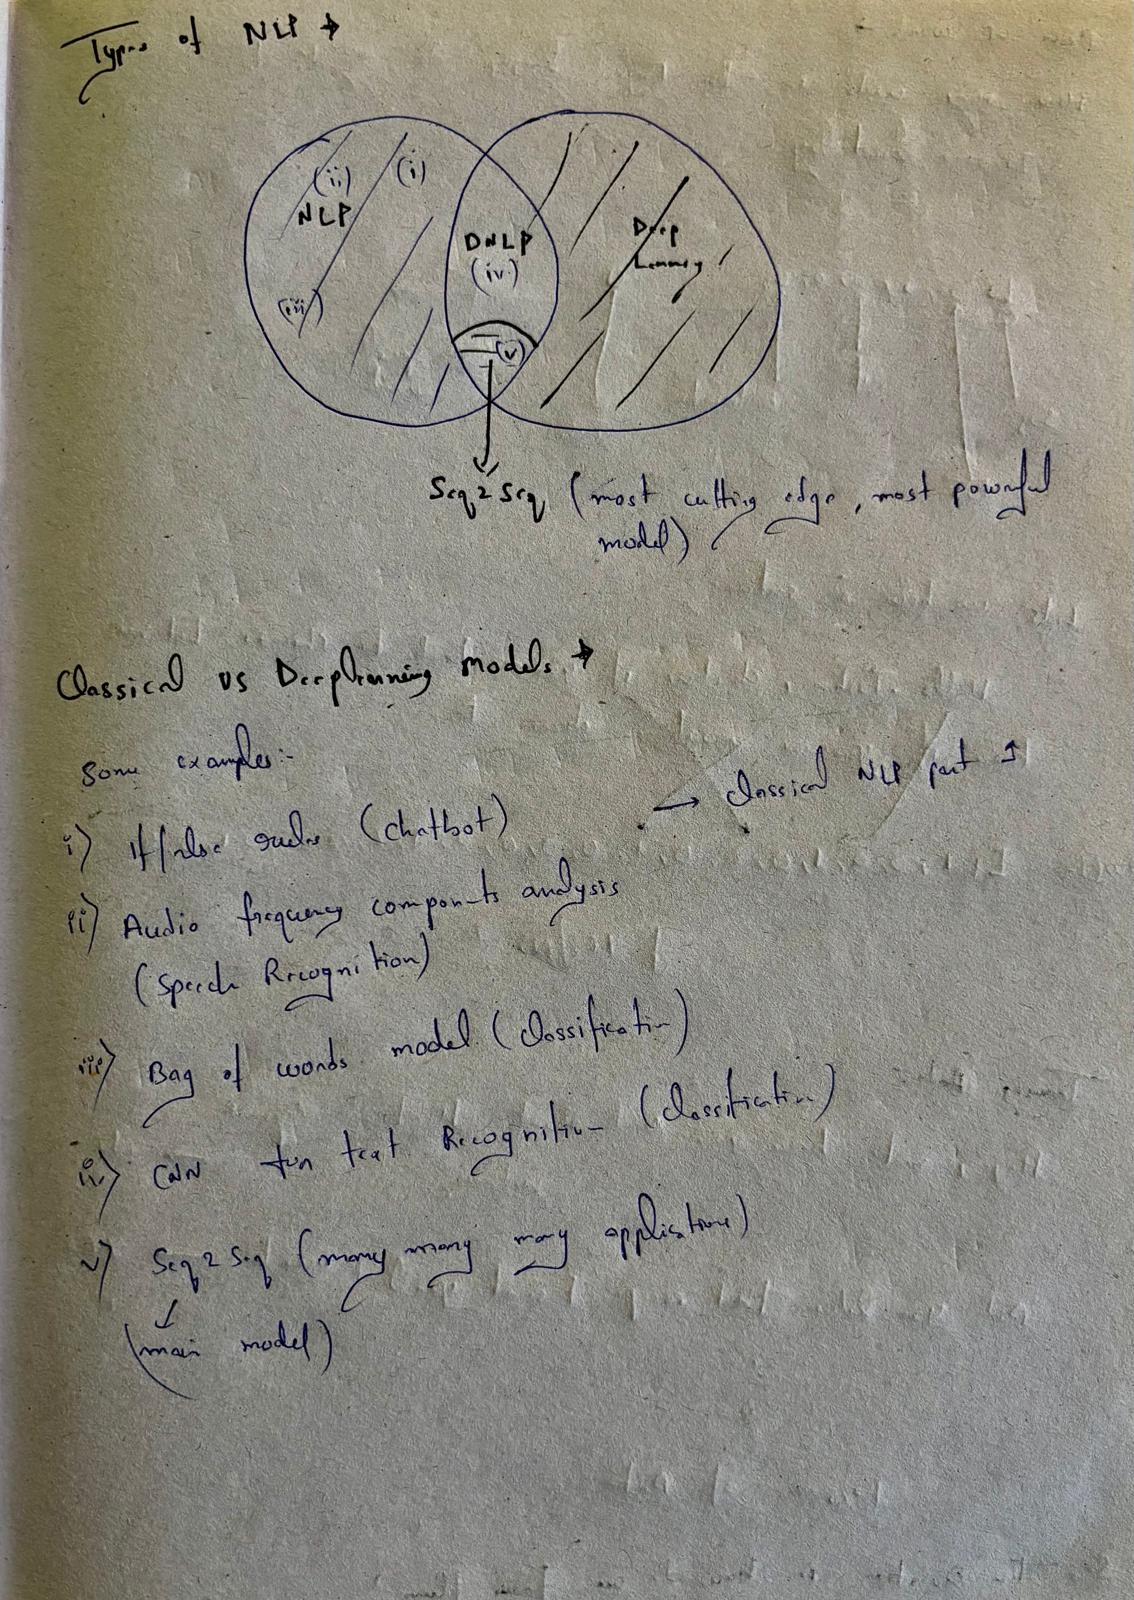

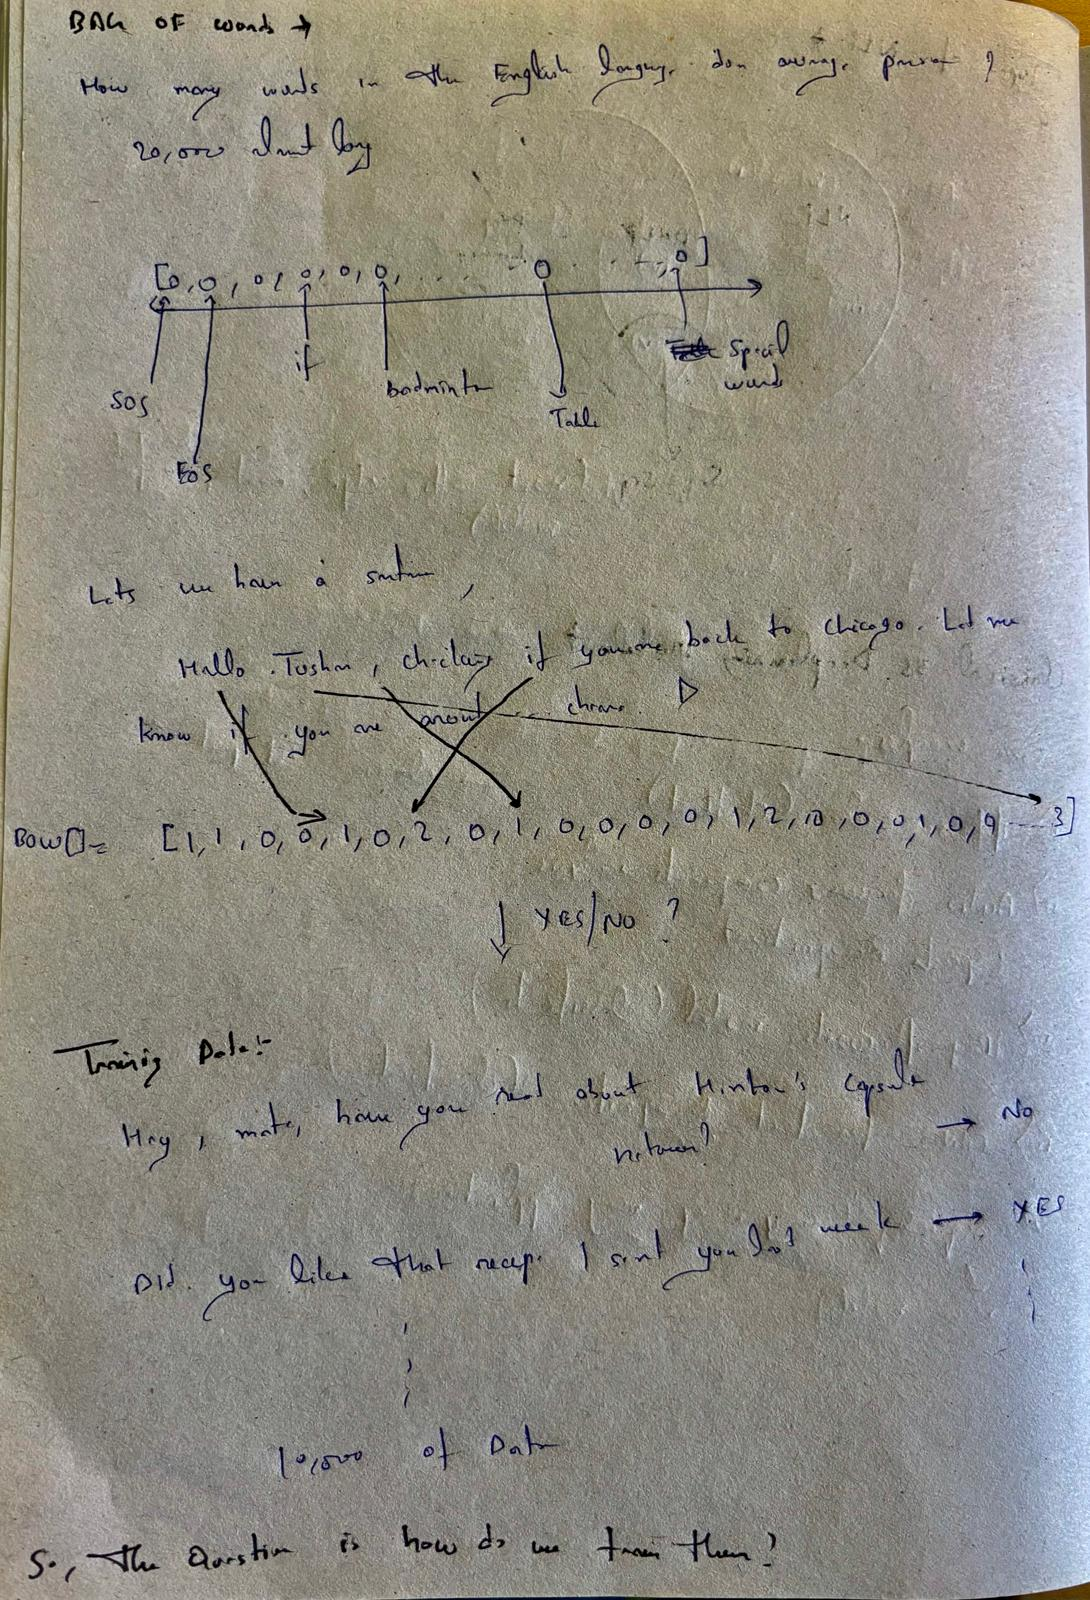

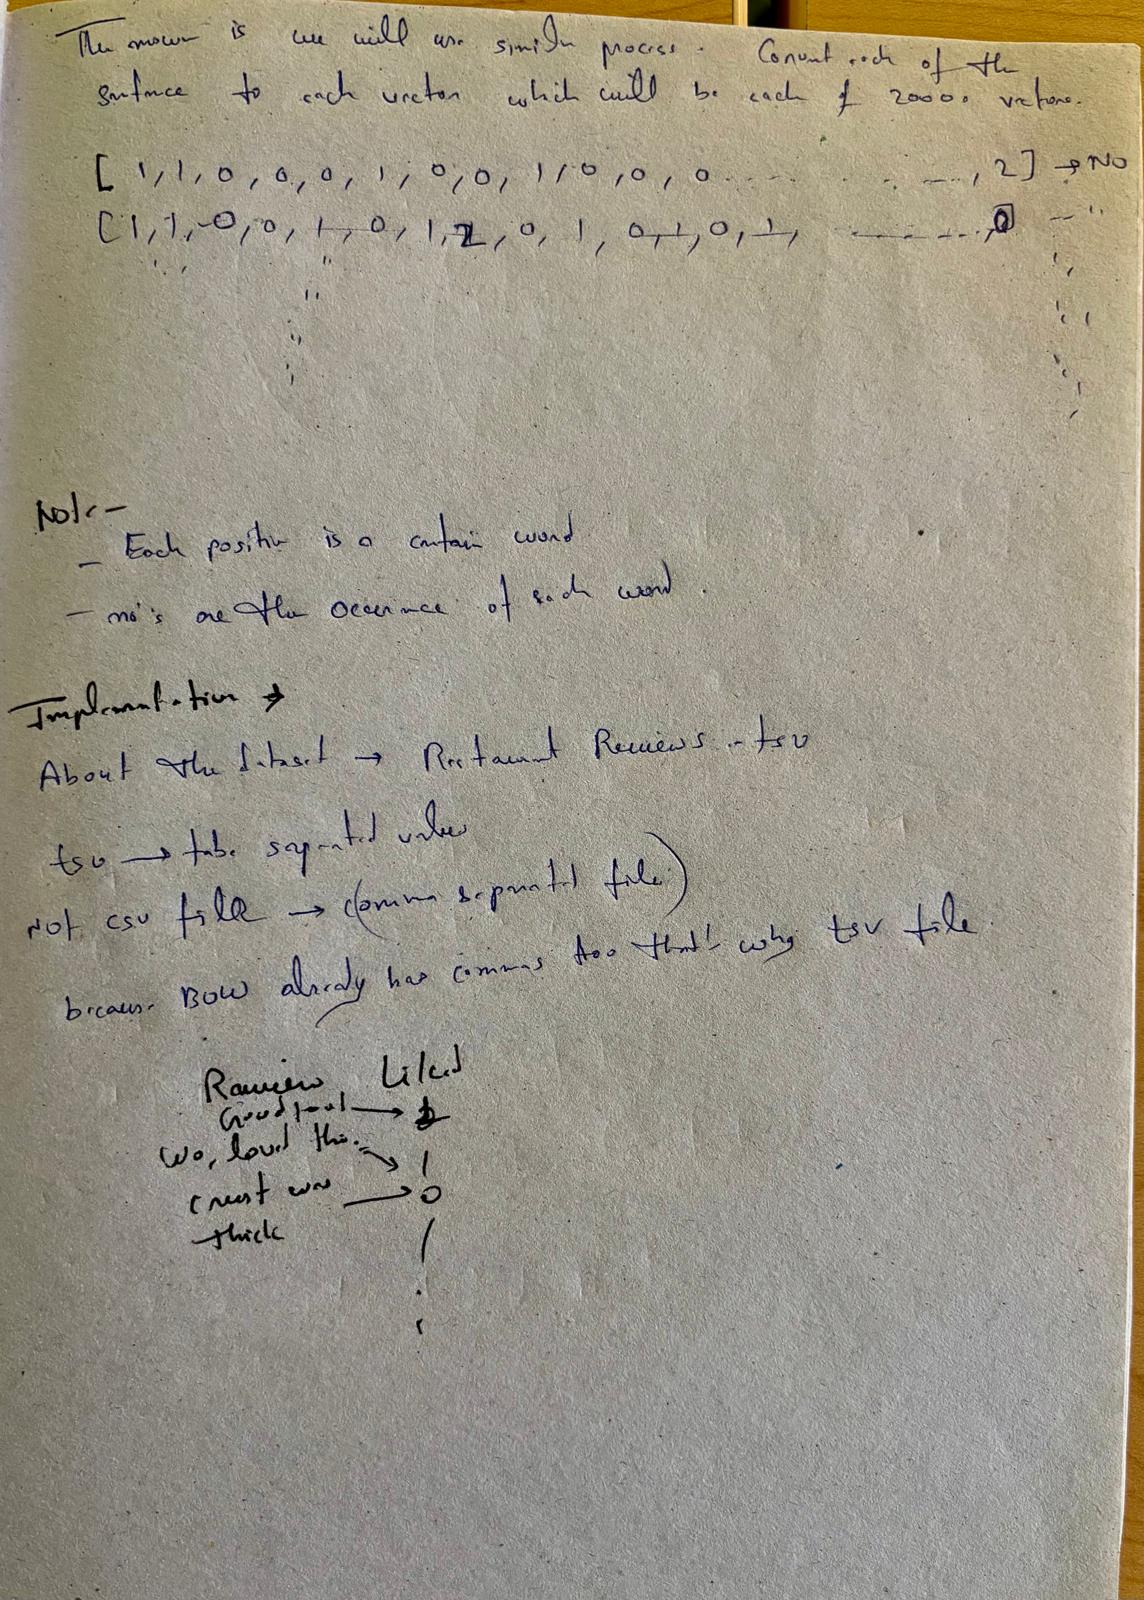

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

Great question, Tushar! 👏
You're referring to two key arguments in the `pd.read_csv()` function:

```python
data = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
```

Let’s break down exactly what `delimiter` and `quoting` do here:

---

## 📌 1. `delimiter='\t'`

### 🔍 What it means:

You're telling pandas that the **columns in your file are separated by a tab (`\t`)**, not by a comma `,`.

### 📄 File type:

* Your file is `.tsv` = **Tab Separated Values**
* So using `delimiter='\t'` is **essential** to read it correctly

---

## 📌 2. `quoting=3`

### 🔍 What it means:

This sets **how quotes (like `"` or `'`) are interpreted** in the data.
`quoting=3` refers to:

```python
csv.QUOTE_NONE
```

### 🛠️ What it does:

* It **tells pandas not to treat quotes specially**
* Treats `"` or `'` just like normal characters
* Useful if your text fields **contain quotes** that shouldn't be parsed

---

## ✅ Full Meaning of the Line

```python
data = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
```

* **Read a tab-separated file**
* **Don't treat quotes as special characters**
* Especially useful for **NLP/text data** (like restaurant reviews) that may contain quotes or punctuation naturally

---

## 🧠 When would you *not* use quoting=3?

If your file uses quotes to wrap fields (like `"Great food"`, `"Nice place"`) and they’re meant to be parsed properly — you’d use:

| Option      | Meaning                   |
| ----------- | ------------------------- |
| `quoting=0` | `QUOTE_MINIMAL` (default) |
| `quoting=1` | `QUOTE_ALL`               |
| `quoting=2` | `QUOTE_NONNUMERIC`        |
| `quoting=3` | `QUOTE_NONE` (used above) |

---


## Cleaning the texts

In [3]:
import re
import nltk
nltk.download('stopwords')    # not needed words in our prediction
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer   # transform text - mostly does stemming for example loved to love
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Great question, Tushar! 🔍
You're looking at a classic **text preprocessing pipeline** for Natural Language Processing (NLP), specifically for cleaning customer **review text**.

Let me break it down **line by line** so you understand what’s happening behind the scenes. 🧠💬

---

## 🧽 Full Breakdown: What’s happening?

### 🔹 Step 1: Import Tools

```python
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
```

* **`re`**: Regular expressions – used for text cleaning
* **`nltk`**: Natural Language Toolkit – useful for text preprocessing
* **`stopwords`**: Common words like "the", "is", "and", etc. that don’t carry much meaning
* **`PorterStemmer`**: Reduces words to their base form (e.g., "loved" → "love")

---

### 🔹 Step 2: Initialize

```python
corpus = []
```

* Create an empty list to store the **cleaned reviews**.

---

### 🔹 Step 3: Loop Through 1000 Reviews

```python
for i in range(0, 1000):
```

* Loop through each review in the dataset.

---

### 🔹 Step 4: Remove Special Characters

```python
review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
```

* Keeps only **letters (a-z, A-Z)** — removes numbers, punctuation, symbols etc.
* Replaces them with a space.

📌 Example: `"I loved it! 10/10"` → `"I loved it"`

---

### 🔹 Step 5: Lowercase & Tokenize

```python
review = review.lower()
review = review.split()
```

* Converts the review to **lowercase**.
* Then splits it into **a list of words** (tokens).

---

### 🔹 Step 6: Stopword Removal & Stemming

```python
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')  # keep "not" because it affects sentiment
```

* Initialize stemmer
* Get list of stopwords
* Remove "not" from stopwords, because it's **important for sentiment** ("not good" ≠ "good")

---

### 🔹 Step 7: Filter Words + Stem

```python
review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
```

* For each word:

  * Remove if it’s a stopword
  * Apply stemming

📌 Example:
`["loved", "the", "service"]` → `["love", "servic"]`

---

### 🔹 Step 8: Join Words Back

```python
review = ' '.join(review)
```

* Rebuild the sentence from list of stemmed words

---

### 🔹 Step 9: Add to Corpus

```python
corpus.append(review)
```

* Add cleaned, processed review to `corpus`

---

## ✅ Final Output

After running the loop, `corpus` will be a list of 1000 cleaned, lowercased, stemmed, and stopword-free reviews — **ready for feature extraction (TF-IDF or Bag of Words)** for training ML models like Naive Bayes or SVM.

---

### 📌 Example:

Original:

```
"I absolutely loved the food and service. Not bad at all!"
```

After preprocessing:

```
"absolut love food servic not bad"
```

---

In [4]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

## Creating the Bag of Words model

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Training the Naive Bayes model on the Training set

In [7]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting the Test set results

In [8]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

## Making the Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[55 42]
 [12 91]]


0.73

## Predicting if a single review is positive or negative

### Positive review

Use our model to predict if the following review:

"I love this restaurant so much"

is positive or negative.

**Solution:** We just repeat the same text preprocessing process we did before, but this time with a single review.

In [10]:
new_review = 'I love this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[1]


The review was correctly predicted as positive by our model.

### Negative review

Use our model to predict if the following review:

"I hate this restaurant so much"

is positive or negative.

**Solution:** We just repeat the same text preprocessing process we did before, but this time with a single review.

In [16]:
new_review = 'I hate this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[0]


The review was correctly predicted as negative by our model.